<a href="https://colab.research.google.com/github/Namrata0212/Cybersecurity/blob/main/DDoS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Reading the dataset and displaying the first 5 rows
df=pd.read_csv('/content/DDoS_Attack_Detection_Classification.csv')
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [5]:
#Identifying malicious IP addresses and calculating the total number of malicious IP addresses including source and destination addresses
malicious_ip=df[df['label']==0]['src'].append(df[df['label']==0]['dst']).unique()
num_malicious_ip=len(malicious_ip)

<ipython-input-5-98586f1efe62>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  malicious_ip=df[df['label']==0]['src'].append(df[df['label']==0]['dst']).unique()


<ipython-input-6-81eb5c200318>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df['src'].append(df['dst']).value_counts().plot(kind='bar')


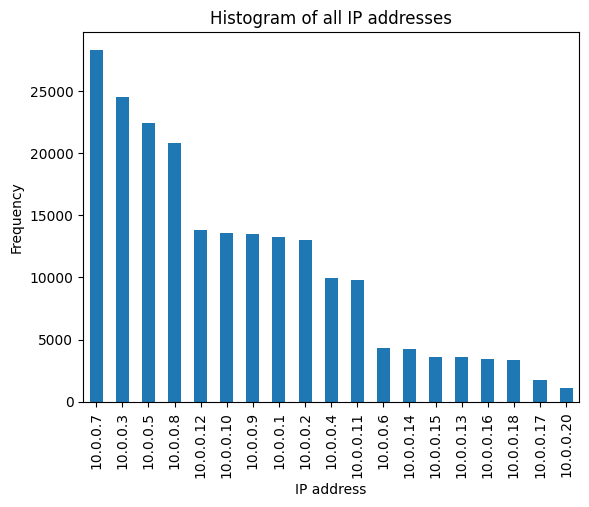

In [6]:
#Plotting a histogram of all IP addresses
df['src'].append(df['dst']).value_counts().plot(kind='bar')
plt.xlabel('IP address')
plt.ylabel('Frequency')
plt.title('Histogram of all IP addresses')
plt.show()

In [7]:
#Finding the missing values in each column of the dataset
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [8]:
#Checking the data type of each column in dataset and if it is a categorical data, we print the column name
for column in df.columns:
  if(df[column].dtype == "object"):
    print(column,end=" ")

src dst Protocol 

In [9]:
#Finding the total number of malicious packages and unique protocols in the dataset
num_malicious_packet=df[df['label']==0].shape[0]
unique_protocols=df[df['label']==0]['Protocol'].unique()
print(f"Malicious packages: {num_malicious_packet}")
print(f"Unique protocols: {unique_protocols}")

Malicious packages: 63561
Unique protocols: ['UDP' 'TCP' 'ICMP']


In [19]:
#Dropping the missing values, keeping the dataset unchanged by setting inplace=True
df.dropna(inplace=True)

In [20]:
#Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [21]:
#Converting categorical data to numerical data
label_encoder=LabelEncoder()
df['Protocol']=label_encoder.fit_transform(df['Protocol'])
df['src']=label_encoder.fit_transform(df['src'])
df['dst']=label_encoder.fit_transform(df['dst'])

#Replacing missing values with 0
df.fillna(0)

#Splitting the dataset into X and Y where Y contains column 'label and X contains all other columns except 'label'
Y=df['label']
X=df.drop(columns=['label'])

#Splitting the dataset into training and testing set where test data will be 20% and training data will be 80%, giving random seed value 42
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [22]:
#Importing the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
#Using Decision Tree to predict whether the packet is malicious or not
decision_Tree=DecisionTreeClassifier()
decision_Tree.fit(X_train, Y_train)

#Predicting on the basis of testing data and storing results
y_pred_dt=decision_Tree.predict(X_test)

#Calculating accuracy comparing predicted values with true test values
accuracy_dt=accuracy_score(Y_test, y_pred_dt)

In [24]:
#Using K Nearest Neighbors to predict whether the packet is malicious or not
knn_model=KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

#Predicting on the basis of testing data and storing results
y_pred_knn=knn_model.predict(X_test)

#Calculating accuracy comparing predicted values with true test values
accuracy_knn=accuracy_score(Y_test, y_pred_knn)

In [31]:
#UsingLinear Regression to predict whether the packet is malicious or not
#Taking maximum iterations to be 1000 to prevent reaching limit of iterations
linear_reression=LogisticRegression(max_iter=1000)
linear_reression.fit(X_train, Y_train)

#Predicting on the basis of testing data and storing results
y_pred_lr=linear_reression.predict(X_test)

#Calculating accuracy comparing predicted values with true test values
accuracy_lr=accuracy_score(Y_test, y_pred_lr)

In [32]:
#Printing the accuracy of all the models
print(f"Accuracy with Decision Tree: {accuracy_dt}")
print(f"Accuracy with KNearestNeighbors: {accuracy_knn}")
print(f"Accuracy with Linear Regression: {accuracy_lr}")

Accuracy with Decision Tree: 1.0
Accuracy with KNearestNeighbors: 0.8908898305084746
Accuracy with Linear Regression: 0.7005970724191063
